#📌 Extracão

In [2]:
import pandas as pd

In [3]:
data = pd.read_json('TelecomX_Data.json')
data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
data = pd.json_normalize(
    data.to_dict(orient='records'), 
)

data


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [5]:
colunas = list(data.columns)
colunas

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

#🔧 Transformação

In [6]:
colunas_para_remover = [
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
]

data = data.drop(columns=colunas_para_remover)

In [7]:
data

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Two year,No,Mailed check,67.85,4627.65


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7267 non-null   object 
 1   Churn                     7267 non-null   object 
 2   customer.gender           7267 non-null   object 
 3   customer.SeniorCitizen    7267 non-null   int64  
 4   customer.Partner          7267 non-null   object 
 5   customer.Dependents       7267 non-null   object 
 6   customer.tenure           7267 non-null   int64  
 7   account.Contract          7267 non-null   object 
 8   account.PaperlessBilling  7267 non-null   object 
 9   account.PaymentMethod     7267 non-null   object 
 10  account.Charges.Monthly   7267 non-null   float64
 11  account.Charges.Total     7267 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 681.4+ KB


In [9]:
import numpy as np

# Tenta converter a coluna 'account.Charges.Total' para float, tratando valores inválidos como NaN
data['account.Charges.Total'] = pd.to_numeric(data['account.Charges.Total'], errors='coerce')

# Verifica quais valores não puderam ser convertidos
invalid_values = data[data['account.Charges.Total'].isna()][['account.Charges.Total']].drop_duplicates()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7267 non-null   object 
 1   Churn                     7267 non-null   object 
 2   customer.gender           7267 non-null   object 
 3   customer.SeniorCitizen    7267 non-null   int64  
 4   customer.Partner          7267 non-null   object 
 5   customer.Dependents       7267 non-null   object 
 6   customer.tenure           7267 non-null   int64  
 7   account.Contract          7267 non-null   object 
 8   account.PaperlessBilling  7267 non-null   object 
 9   account.PaymentMethod     7267 non-null   object 
 10  account.Charges.Monthly   7267 non-null   float64
 11  account.Charges.Total     7256 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 681.4+ KB


In [10]:
data.columns[data.isnull().any()].tolist()
data.fillna(0, inplace=True)

In [11]:
data['Contas_Diarias'] = (data['account.Charges.Monthly'] / 30).round(2)

data.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [19]:
cols_yes_no = ['Churn', 'customer.Partner', 'customer.Dependents', 'account.PaperlessBilling']

data[cols_yes_no] = data[cols_yes_no].replace({'Yes': 1, 'No': 0})

data['Churn'].unique()

array([0, 1, ''], dtype=object)

#📊 Carga e análise

In [13]:
data.describe()

,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.593230,64.720098,2277.182035,2.157292
std,0.369074,0.499782,0.458343,24.571773,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,9.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000,1389.200000,2.340000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.960000


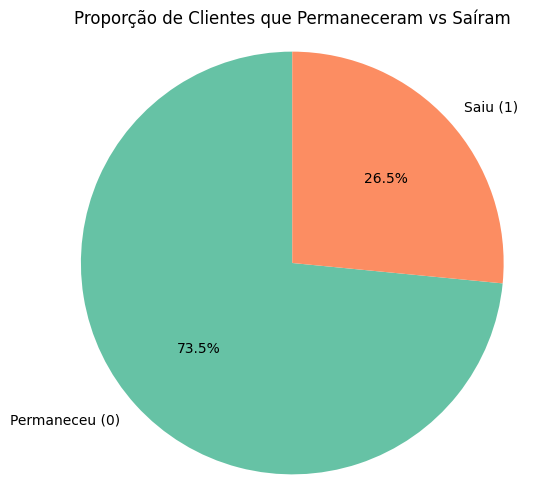

In [20]:
import matplotlib.pyplot as plt

data = data[data['Churn'].isin([0, 1])]

# Contar os valores da coluna Churn em porcentagem
churn_counts = data['Churn'].value_counts(normalize=True) * 100

# Definir rótulos e cores
labels = ['Permaneceu (0)', 'Saiu (1)']
colors = ['#66c2a5', '#fc8d62']

# Criar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proporção de Clientes que Permaneceram vs Saíram')
plt.axis('equal')  # para deixar o gráfico circular
plt.show()


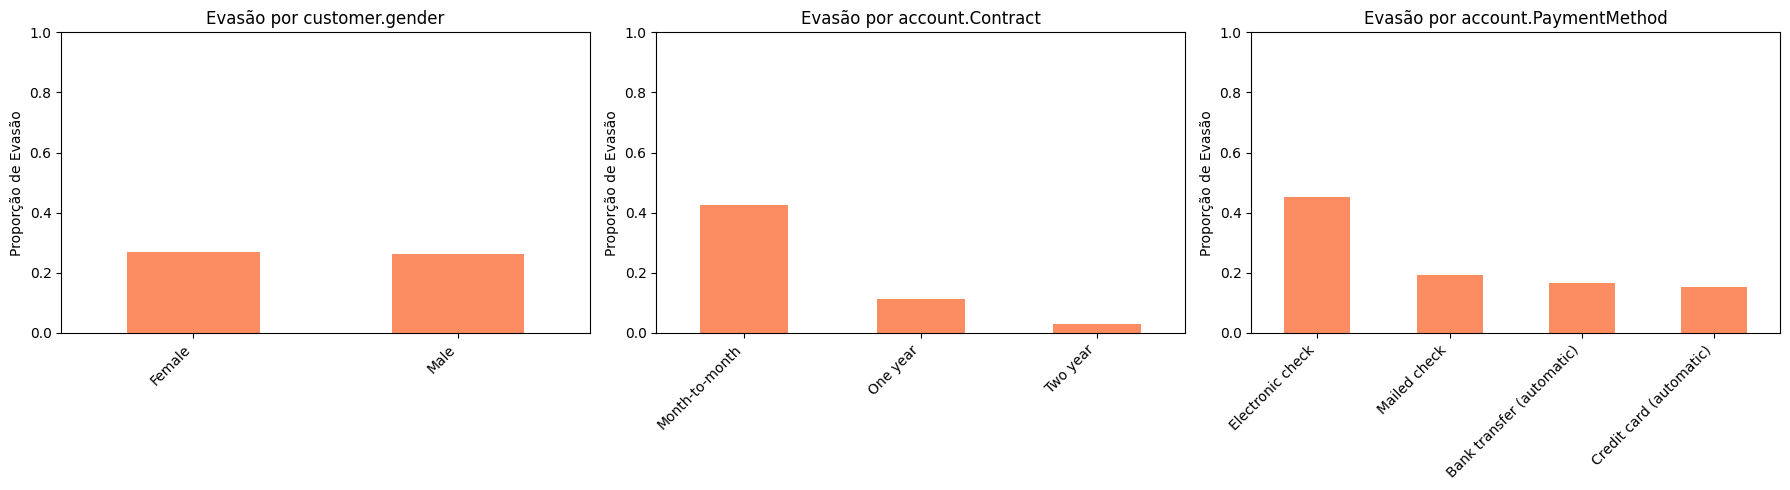

In [22]:
# Garantir que churn seja 0 ou 1
data = data[data['Churn'].isin([0, 1])]

# Lista de variáveis categóricas para analisar
variaveis_categoricas = ['customer.gender', 'account.Contract', 'account.PaymentMethod']

# Tamanho da figura com base na quantidade de variáveis
plt.figure(figsize=(len(variaveis_categoricas) * 6, 5))

# Loop para plotar cada variável
for i, var in enumerate(variaveis_categoricas, 1):
    # Calcular proporção de churn por categoria
    churn_rate = data.groupby(var)['Churn'].mean().sort_values(ascending=False)
    
    # Subplot
    plt.subplot(1, len(variaveis_categoricas), i)
    churn_rate.plot(kind='bar', color='#fc8d62')
    plt.title(f'Evasão por {var}')
    plt.ylabel('Proporção de Evasão')
    plt.xlabel('')
    plt.ylim(0, 1)  # Fixar o eixo Y de 0 a 1
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


C:\Users\rose_\AppData\Local\Temp\ipykernel_16088\3602411241.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=var, palette=['#66c2a5', '#fc8d62'])
C:\Users\rose_\AppData\Local\Temp\ipykernel_16088\3602411241.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=var, palette=['#66c2a5', '#fc8d62'])


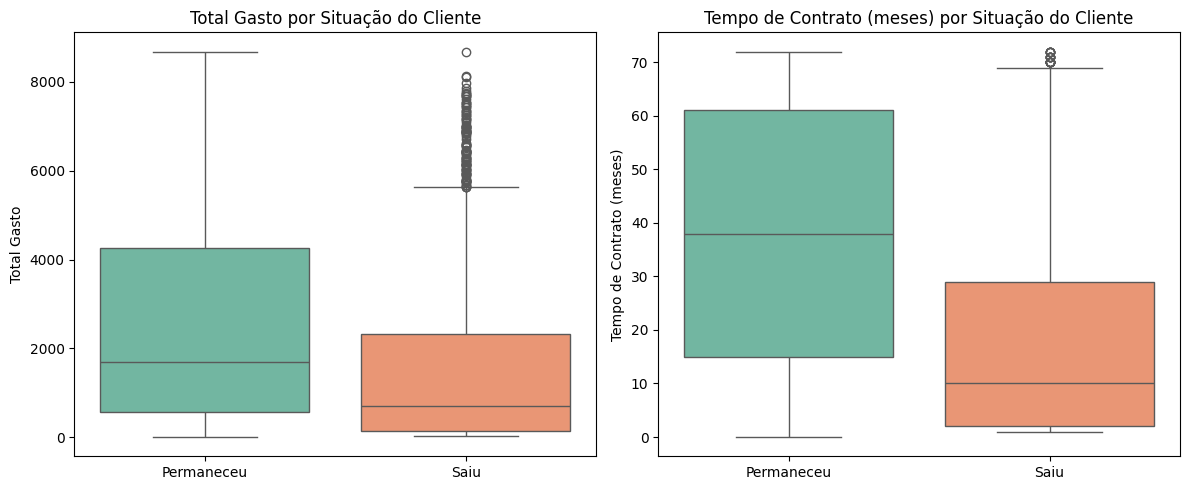

In [26]:
# Garantir que churn seja 0 ou 1
data = data[data['Churn'].isin([0, 1])]

# Variáveis numéricas e seus títulos em português
variaveis_numericas = {
    'account.Charges.Total': 'Total Gasto',
    'customer.tenure': 'Tempo de Contrato (meses)'
}

# Tamanho do gráfico com base na quantidade de variáveis
plt.figure(figsize=(len(variaveis_numericas) * 6, 5))

# Loop para cada variável
for i, (var, titulo) in enumerate(variaveis_numericas.items(), 1):
    plt.subplot(1, len(variaveis_numericas), i)
    sns.boxplot(data=data, x='Churn', y=var, palette=['#66c2a5', '#fc8d62'])
    plt.title(f'{titulo} por Situação do Cliente')
    plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
    plt.xlabel('')
    plt.ylabel(titulo)

plt.tight_layout()
plt.show()


#📄Relatorio Final

## **Análise de Evasão de Clientes (Churn)**

### **1. Introdução**

A evasão de clientes, também conhecida como **Churn**, representa a taxa de clientes que deixam de utilizar os serviços de uma empresa ao longo do tempo. Esse é um indicador estratégico, especialmente em negócios com receita recorrente (como telecomunicações, serviços por assinatura ou plataformas digitais), pois impacta diretamente na sustentabilidade e lucratividade da empresa.

O objetivo desta análise é **identificar padrões de comportamento entre clientes que cancelaram e os que permaneceram ativos**, utilizando dados reais de consumo, perfil e relacionamento. Com base nisso, buscamos oferecer **insights que possam orientar ações para reduzir o Churn e aumentar a retenção de clientes.**

---

### **2. Limpeza e Tratamento de Dados**

A análise foi realizada com base em um dataset contendo dados de clientes, incluindo informações demográficas, tipo de contrato, forma de pagamento, valor total gasto, tempo de permanência, entre outros.

As etapas de preparação dos dados incluíram:

* **Importação do arquivo json** usando o `pandas`.
* Conversão de variáveis categóricas e numéricas com nomes compostos (ex: `customer.gender`, `account.Contract`) para uso em agrupamentos.
* Verificação e limpeza de valores ausentes ou inconsistentes.

---

### **3. Análise Exploratória de Dados**

A análise permitiu investigar como o comportamento de Churn se relaciona com diferentes variáveis.

#### **3.1 Distribuição Geral de Evasão**

Um gráfico de pizza mostrou a proporção geral de clientes que cancelaram e os que permaneceram:

* A maior parte dos clientes **permaneceu**, mas uma **fração significativa cancelou**, indicando um problema real de evasão.

#### **3.2 Churn por Variáveis Categóricas**

Foram analisadas três variáveis principais:

* **Gênero (`customer.gender`)**
* **Tipo de contrato (`account.Contract`)**
* **Forma de pagamento (`account.PaymentMethod`)**

**Gráficos de barras** revelaram que:

* Clientes com **contrato mensal (Month-to-month)** apresentam taxas significativamente maiores de Churn.
* **Pagamentos via débito automático e cheque eletrônico** também estão mais associados à evasão.
* A **diferença entre gêneros** foi pequena, não sendo um fator determinante.

#### **3.3 Variáveis Numéricas e Evasão**

**Boxplots** foram utilizados para visualizar a distribuição do Churn em relação a:

* **Total gasto (`account.Charges.Total`)**
* **Tempo de contrato (`customer.tenure`)**

Os resultados indicaram que:

* Clientes com **tempo de contrato mais curto** têm maior propensão ao cancelamento.
* O **total gasto é geralmente menor** entre os clientes que cancelaram, sugerindo menor engajamento ou valor percebido.

---

### **4. Conclusões e Insights**

Com base nas análises, os principais insights são:

* O **tipo de contrato** tem forte relação com a evasão: contratos mensais apresentam muito mais cancelamentos.
* Clientes com **pouco tempo de permanência (tenure)** tendem a cancelar mais, evidenciando a importância do engajamento inicial.
* Métodos de pagamento mais "manuais" (como cheques eletrônicos) parecem estar ligados a maiores taxas de Churn.
* O **perfil de consumo (gasto total)** também se correlaciona com evasão: clientes que gastam menos tendem a sair com mais facilidade.

---

### **5. Recomendações**

Com base na análise, recomendamos:

1. **Incentivar contratos de longo prazo**, com benefícios claros em relação ao contrato mensal.
2. **Investir no onboarding e suporte aos clientes nos primeiros meses**, quando o risco de cancelamento é maior.
3. **Oferecer facilidades de pagamento automatizado**, como cartão de crédito, evitando fricções.
4. **Analisar clientes com baixo gasto mensal** e criar estratégias personalizadas para aumentar o engajamento.
5. Implementar **modelos preditivos de Churn** usando essas variáveis para identificar clientes em risco antes que cancelem.
